In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm import trange
import pretrainedmodels

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('use: ',device)

use:  cuda


In [ ]:
def init_weight(m):
    

In [4]:
batch_size = 256

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True, drop_last=True)
testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size, shuffle=False, drop_last=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [6]:
class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Linear(512, 10) # 32x32 img -> MaxPool:5 = 1x1xC(output)
    
    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out
    
    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           #nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
                
        return nn.Sequential(*layers)

In [7]:
cp = torch.load('../save/VGG11_default_checkpoint.pt')

In [8]:
model=VGG('VGG13').to(device)

In [9]:
model.state_dict().keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.15.weight', 'features.15.bias', 'features.17.weight', 'features.17.bias', 'features.20.weight', 'features.20.bias', 'features.22.weight', 'features.22.bias', 'classifier.weight', 'classifier.bias'])

In [10]:
model.state_dict()['features.0.weight'].copy_(cp['model_state_dict']['features.0.weight'])#64_weight
model.state_dict()['features.0.bias'].copy_(cp['model_state_dict']['features.0.bias'])#64_bias
model.state_dict()['features.5.weight'].copy_(cp['model_state_dict']['features.3.weight'])#128_weight
model.state_dict()['features.5.bias'].copy_(cp['model_state_dict']['features.3.bias'])#128_bias
model.state_dict()['features.10.weight'].copy_(cp['model_state_dict']['features.6.weight'])#256_weight
model.state_dict()['features.10.bias'].copy_(cp['model_state_dict']['features.6.bias'])#256_bias
model.state_dict()['features.12.weight'].copy_(cp['model_state_dict']['features.8.weight'])#256_weight
model.state_dict()['features.12.bias'].copy_(cp['model_state_dict']['features.8.bias'])#256_bias

tensor([-9.6307e-02, -6.3981e-02, -2.0787e-02, -6.0120e-02, -3.0474e-02,
         5.3520e-02,  1.4224e-01, -3.1359e-03, -5.3945e-02, -5.7479e-03,
        -7.6409e-02, -5.2208e-02,  2.6886e-02,  6.1723e-02,  3.7134e-02,
        -1.0836e-01,  1.7204e-02,  3.7348e-02, -2.4010e-02,  1.4214e-02,
        -6.2564e-02, -6.7955e-03, -4.3203e-02, -7.3024e-02, -1.9597e-02,
        -2.4603e-02, -9.3939e-03, -7.8519e-02, -7.3776e-02, -1.4225e-02,
        -4.2548e-02, -2.1567e-02,  2.5212e-03,  2.4545e-02,  1.8092e-02,
        -1.0579e-02,  1.6344e-02, -5.8259e-02, -5.4077e-02, -1.6832e-02,
         5.5950e-02, -3.6089e-02, -3.1912e-02,  2.4301e-04, -3.3998e-02,
        -5.2048e-02, -4.8185e-02,  2.7619e-02, -7.0189e-03, -1.1774e-01,
        -5.3953e-02,  2.0322e-02, -5.2981e-02, -1.5786e-02, -2.9249e-02,
         6.0297e-02, -5.2111e-02, -2.6225e-02, -2.1200e-02, -9.8737e-02,
        -2.0648e-02,  9.8035e-03, -4.0156e-02, -4.1629e-02,  7.1549e-02,
         1.8277e-02, -9.3071e-02,  3.3768e-02,  1.8

In [11]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

In [12]:
total_batch = len(trainloader)
print(f'total_batch : {total_batch}')

total_batch : 195


In [22]:
training_epoch =  100
train_acc_list = []
test_acc_list = []
pbar = trange(training_epoch, desc='Loss : 0', leave=True, position=0)

for epoch in pbar:
    train_acc = 0
    test_acc = 0
    model.train()
    for X,y in trainloader:
        X = X.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        train_acc += (output.argmax(1)==y).float().mean()
    train_acc_list.append(train_acc/total_batch) #acc per epoch
    for param_group in optimizer.param_groups:
        lr = param_group['lr']
        if epoch%10 == 0:
            print('epoch: {:3d}, lr={:.6f}'.format(epoch, lr))
    scheduler.step(loss)
    model.eval()
    pbar.set_description("Loss : %.3f" % loss)
    for X,y in testloader:
        with torch.no_grad():
            X = X.to(device)
            y = y.to(device)
            result = model(X)
            test_acc += (result.argmax(1)==y).float().mean()
    test_acc_list.append(test_acc/len(testloader))

Loss : 0.624:   0%|          | 0/100 [00:15<?, ?it/s]

epoch:   0, lr=0.010000


Loss : 0.446:  10%|█         | 10/100 [03:06<25:37, 17.09s/it]

epoch:  10, lr=0.010000


Loss : 0.265:  20%|██        | 20/100 [05:57<22:50, 17.13s/it]

epoch:  20, lr=0.010000


Loss : 0.203:  30%|███       | 30/100 [08:49<19:59, 17.14s/it]

epoch:  30, lr=0.010000


Loss : 0.166:  40%|████      | 40/100 [11:40<17:08, 17.14s/it]

epoch:  40, lr=0.010000


Loss : 0.143:  50%|█████     | 50/100 [14:32<14:17, 17.16s/it]

epoch:  50, lr=0.010000


Loss : 0.130:  60%|██████    | 60/100 [17:23<11:26, 17.17s/it]

epoch:  60, lr=0.010000


Loss : 0.102:  70%|███████   | 70/100 [20:15<08:34, 17.15s/it]

epoch:  70, lr=0.010000


Loss : 0.147:  80%|████████  | 80/100 [23:07<05:43, 17.16s/it]

epoch:  80, lr=0.010000


Loss : 0.077:  90%|█████████ | 90/100 [25:58<02:51, 17.17s/it]

epoch:  90, lr=0.010000


Loss : 0.009: 100%|██████████| 100/100 [28:34<00:00, 17.14s/it]


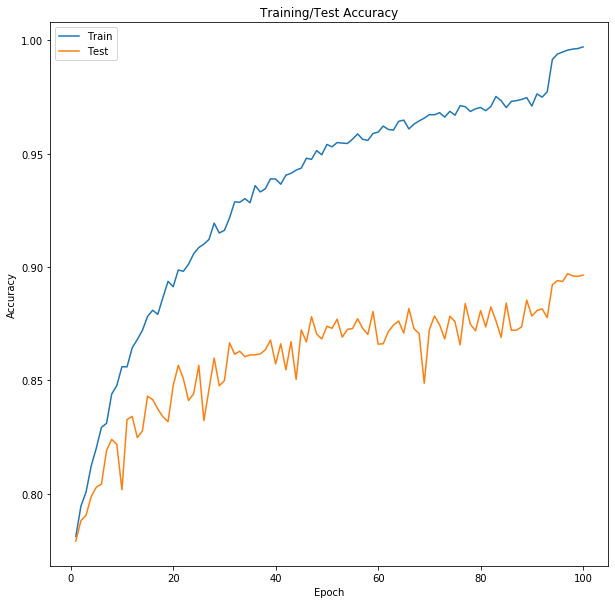

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title("Training/Test Accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.plot(range(1, len(train_acc_list)+1), train_acc_list)
ax.plot(range(1, len(test_acc_list)+1), test_acc_list)
ax.legend(['Train', 'Test'])
plt.show()

In [24]:
torch.save({
            'epoch': training_epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'train_accuracy': train_acc_list,
            'test_accuracy' : test_acc_list
            }, '../save/VGG13_default_checkpoint.pt')

In [25]:
cp = torch.load('../save/VGG13_default_checkpoint.pt')

In [26]:
cp['test_accuracy'][99]

tensor(0.8964, device='cuda:0')